In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from SimCLR_data_util import preprocess_for_train
from resnet_small import ResNet18
from tensorflow.keras.layers import Dense
from viewmaker import *
from SimCLR import *

In [2]:
from datasets.cifar_10 import get_unsupervised_dataset
dataset = get_unsupervised_dataset(batch_size=64)

In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [4]:
viewmaker = Viewmaker()

def get_encoder():
    model = ResNet18(10)
    encoder = tf.keras.Sequential(model.layers[:-1])
    return encoder

encoder = get_encoder()

def get_projection_head():

    projection_head = tf.keras.Sequential([
        Dense(1024, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        Dense(256)
    ])
    return projection_head

projection_head = get_projection_head()

model = SimCLR_adversarial(encoder, viewmaker, projection_head)

In [5]:
model.load_weights('./cifar_10_experiment/viewmaker_and_simclr_weights/ckpt1')

In [6]:
model.layers[2]

In [30]:
from datasets.cifar_10 import get_unsupervised_dataset

dataset = get_unsupervised_dataset(batch_size=64)
batch = next(iter(dataset))

In [31]:
distorted = model.layers[2](batch)

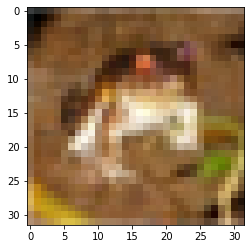

In [32]:
plt.imshow(batch[0])

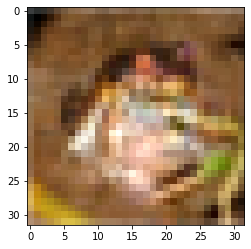

In [33]:
plt.imshow(distorted[0])

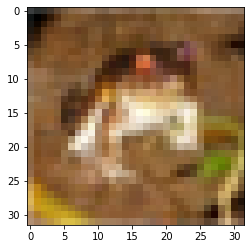

In [34]:
plt.imshow(batch[0])

In [ ]:
plt.imshow(distorted[0])

In [35]:
viewmaker=model.augmentation

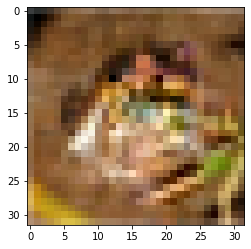

In [39]:
plt.imshow(viewmaker(batch[:1])[0])

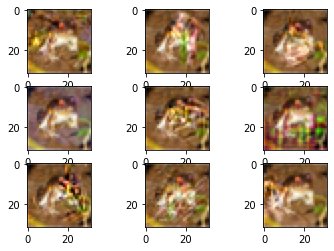

In [41]:
fig, axes = plt.subplots(3, 3)
for row in axes:
    for axis in row:
        axis.imshow(viewmaker(batch[:1])[0])

In [55]:
def display_views(idx):
    fig, axes = plt.subplots(3, 3)
    for row in axes:
        for axis in row:
            axis.imshow(viewmaker(batch[idx:idx+1])[0])

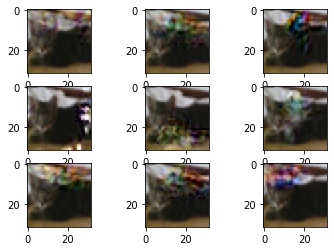

In [61]:
display_views(9)